# Predicting Airbnb Price in Seattle and Boston

This project will adhere to __CRISP-DM__(Cross Industry Process for Data Mining) Process which includes the following steps:
>1. Business Understanding
2. Data Understanding
3. Prepare Data
4. Model data
5. Results.
6. Deploy

# 1. Business Understanding
From a business standpoint, we would like to understand how rental prices for Airbnb properties are set. Therefore, we want to build a model that learns on Seattle and Boston Airbnb datasets and predict the price. To this end, one might want to ask the following questions:
    - Q1. Is there a difference in price in two cities?
    - Q2. How many Airbnb properties are hosted by the same host on average?
    - Q3. How does price spread based on location - is it evenly distributed or unevenly? 
    - Q4. What are the most important predictors for the price?

# 2. Data Understanding

You can find data for [Seattle] and [Boston] at Kaggle. 

[Seattle]: https://www.kaggle.com/airbnb/seattle/data
[Boston]: https://www.kaggle.com/airbnb/boston

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
from os import path, getcwd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import HTML, display
from sklearn.impute import SimpleImputer
from ast import literal_eval
from sklearn.preprocessing import StandardScaler
import warnings
## helper.py has all modularized process functions - preprocessing, training
from helper import preprocessor

warnings.filterwarnings('ignore')
sns.set(style='whitegrid', rc={"lines.linewidth":2, 'grid.color': '.8', 'grid.linestyle':':'})

In [2]:
## read files
cities = ['seattle', 'boston']
# retrieve current directory
cwd = path.join(getcwd(), 'data')

## Read files to data frames
sea_df = pd.read_csv(path.join(cwd, cities[0], 'listings.csv'), parse_dates=['last_scraped', 'first_review', 'last_review'])
bos_df = pd.read_csv(path.join(cwd, cities[1], 'listings.csv'), parse_dates=['last_scraped', 'first_review', 'last_review'])

In [3]:
sea_df.shape, bos_df.shape

((3818, 92), (3585, 95))

Notice feature numbers differ. 

In [4]:
## Unify columns
bos_df = bos_df[sea_df.columns]

In [5]:
## Display first few rows
sea_df.head(3)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15


In [6]:
bos_df.head(3)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47


In [7]:
sea_df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

After cursory investigation, I trimmed down feature size to 42. For example, we can identify property with 'id', therefore 'name' is redundant and so is with 'host_id' and 'host_name'. Also, 'last_scraped' is one value column for both data frames, therefore, we do not include it.

In [8]:
cols = ['id', 'host_id', 'host_verifications', 'host_is_superhost', 'zipcode', 'bathrooms', 'bedrooms', 'beds', 
        'bed_type', 'amenities', 'square_feet', 'price', 'weekly_price', 'monthly_price', 'security_deposit', 
        'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights','maximum_nights', 'calendar_updated', 
        'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 
        'number_of_reviews', 'first_review', 'last_review', 'review_scores_rating','review_scores_accuracy', 
        'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 
        'review_scores_value', 'instant_bookable', 'cancellation_policy', 'require_guest_profile_picture', 
        'require_guest_phone_verification','calculated_host_listings_count', 'reviews_per_month']

sea_df = sea_df[cols]
bos_df = bos_df[cols]

# 3. Prepare Data

In [9]:
temp1 = sea_df.isnull().sum()/sea_df.shape[0]
temp1[temp1 > 0] 

host_is_superhost              0.000524
zipcode                        0.001833
bathrooms                      0.004191
bedrooms                       0.001572
beds                           0.000262
square_feet                    0.974594
weekly_price                   0.473808
monthly_price                  0.602672
security_deposit               0.511262
cleaning_fee                   0.269775
first_review                   0.164222
last_review                    0.164222
review_scores_rating           0.169460
review_scores_accuracy         0.172342
review_scores_cleanliness      0.171032
review_scores_checkin          0.172342
review_scores_communication    0.170508
review_scores_location         0.171556
review_scores_value            0.171818
reviews_per_month              0.164222
dtype: float64

In [10]:
temp2 = bos_df.isnull().sum() / bos_df.shape[0]
temp2[temp2 > 0]

zipcode                        0.010600
bathrooms                      0.003905
bedrooms                       0.002789
beds                           0.002510
square_feet                    0.984379
weekly_price                   0.751185
monthly_price                  0.752301
security_deposit               0.625662
cleaning_fee                   0.308787
has_availability               1.000000
first_review                   0.210879
last_review                    0.210879
review_scores_rating           0.226778
review_scores_accuracy         0.229568
review_scores_cleanliness      0.228173
review_scores_checkin          0.228731
review_scores_communication    0.228173
review_scores_location         0.229289
review_scores_value            0.229010
reviews_per_month              0.210879
dtype: float64

In [11]:
## Let us drop features with more than 20% missings
sea_df = sea_df.drop(columns=temp2[temp2>.2].index.values)
bos_df = bos_df.drop(columns=temp2[temp2>.2].index.values)

In [12]:
sea_df.shape, bos_df.shape

((3818, 26), (3585, 26))

In [13]:
temp1 = sea_df.isnull().sum() 
temp1[temp1 > 0]

host_is_superhost     2
zipcode               7
bathrooms            16
bedrooms              6
beds                  1
dtype: int64

In [14]:
temp2 = bos_df.isnull().sum()
temp2[temp2 > 0]

zipcode      38
bathrooms    14
bedrooms     10
beds          9
dtype: int64

Now let's impute the following statistics to missing values
- host_is_superhost, zipcode: mode
- bathrooms, bedrooms, beds: mean

In [15]:
imp_mode = SimpleImputer(strategy='most_frequent')

sea_df[['host_is_superhost', 'zipcode']] = imp_mode.fit_transform(sea_df[['host_is_superhost', 'zipcode']])
bos_df[['host_is_superhost', 'zipcode']] = imp_mode.fit_transform(bos_df[['host_is_superhost', 'zipcode']])

imp_mean = SimpleImputer(strategy='mean')
sea_df[['bathrooms', 'bedrooms', 'beds']] = imp_mode.fit_transform(sea_df[['bathrooms', 'bedrooms', 'beds']])
bos_df[['bathrooms', 'bedrooms', 'beds']] = imp_mode.fit_transform(bos_df[['bathrooms', 'bedrooms', 'beds']])

In [16]:
sea_df[sea_df.columns[:14]].head()

,id,host_id,host_verifications,host_is_superhost,zipcode,bathrooms,bedrooms,beds,bed_type,amenities,price,guests_included,extra_people,minimum_nights
0,241032,956883,"['email', 'phone', 'reviews', 'kba']",f,98119,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",$85.00,2,$5.00,1
1,953595,5177328,"['email', 'phone', 'facebook', 'linkedin', 're...",t,98119,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",$150.00,1,$0.00,2
2,3308979,16708587,"['email', 'phone', 'google', 'reviews', 'jumio']",f,98119,4.5,5.0,7.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",$975.00,10,$25.00,4
3,7421966,9851441,"['email', 'phone', 'facebook', 'reviews', 'jum...",f,98119,1.0,0.0,2.0,Real Bed,"{Internet,""Wireless Internet"",Kitchen,""Indoor ...",$100.00,1,$0.00,1
4,278830,1452570,"['email', 'phone', 'facebook', 'reviews', 'kba']",f,98119,2.0,3.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",$450.00,6,$15.00,1


In [17]:
sea_df[sea_df.columns[14:]].head()

,maximum_nights,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count
0,365,4 weeks ago,14,41,71,346,207,f,moderate,f,f,2
1,90,today,13,13,16,291,43,f,strict,t,t,6
2,30,5 weeks ago,1,6,17,220,20,f,strict,f,f,2
3,1125,6 months ago,0,0,0,143,0,f,flexible,f,f,1
4,1125,7 weeks ago,30,60,90,365,38,f,strict,f,f,1


In [18]:
sea_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 26 columns):
id                                  3818 non-null int64
host_id                             3818 non-null int64
host_verifications                  3818 non-null object
host_is_superhost                   3818 non-null object
zipcode                             3818 non-null object
bathrooms                           3818 non-null float64
bedrooms                            3818 non-null float64
beds                                3818 non-null float64
bed_type                            3818 non-null object
amenities                           3818 non-null object
price                               3818 non-null object
guests_included                     3818 non-null int64
extra_people                        3818 non-null object
minimum_nights                      3818 non-null int64
maximum_nights                      3818 non-null int64
calendar_updated                    3818

### Transforming certain features

It seems that we need to touch on some features - zipcode, price, extra_people, host_verification, ammenities. Since host_verification and ammenities are categorical variables, I will set them apart now and store refined values in categorical dataframes.

In [19]:
## 1) Zipcode: remove unnecessary details or typos
## extract numbers 
sea_df.zipcode[sea_df.zipcode.str.contains('[^0-9]', regex=True)] = sea_df.zipcode.str.extract(r'(?:[^0-9])(\d+)')[0].value_counts().index[0]
bos_df.zipcode = bos_df.zipcode.str.extract(r'(\d+)(?<![^0-9])')[0]

## 2) Price & extra_people: str -> float
## drop '$' and ','
sea_df.price = sea_df.price.map(lambda str_price: str_price[1:]).str.replace(',', '').astype(float)
bos_df.price = bos_df.price.map(lambda str_price: str_price[1:]).str.replace(',', '').astype(float)
sea_df.extra_people = sea_df.extra_people.map(lambda str_price: str_price[1:]).str.replace(',', '').astype(float)
bos_df.extra_people = bos_df.extra_people.map(lambda str_price: str_price[1:]).str.replace(',', '').astype(float)

## 3) host_verifications 
### seattle
sea_df.host_verifications = sea_df.host_verifications.replace(['[]', 'None'], "['none']")
### define seattle categorical dummy dataframe
sea_cat = pd.get_dummies(sea_df.host_verifications.map(literal_eval).apply(pd.Series).stack(), prefix='host_ver').sum(level=0)
### boston
bos_df.host_verifications = bos_df.host_verifications.replace(['[]', 'None'], "['none']")
### define boston categorical dummy dataframe
bos_cat = pd.get_dummies(bos_df.host_verifications.map(literal_eval).apply(pd.Series).stack(), prefix='host_ver').sum(level=0)
### unify column width and order
bos_cat['host_ver_photographer'] = 0
bos_cat.columns = sea_cat.columns
## drop host_verifications from sea_df, bos_df
sea_df = sea_df.drop(columns=['host_verifications'])
bos_df = bos_df.drop(columns=['host_verifications'])

## 4) amenities
### change format to string list same as host_verifications
sea_df['amenities'] = sea_df['amenities'].map(lambda d: [amenity.replace('"', "").replace("{", "").replace("}", "") for amenity in d.split(",")]).astype(str)
bos_df['amenities'] = bos_df['amenities'].map(lambda d: [amenity.replace('"', "").replace("{", "").replace("}", "") for amenity in d.split(",")]).astype(str)

### seattle
sea_df.amenities = sea_df.amenities.replace("['']", "['none']")
### boston
bos_df.amenities = bos_df.amenities.replace("['']", "['none']")
## temporary dataframe before adding to sea_cat
temp1 = pd.get_dummies(sea_df.amenities.map(literal_eval).apply(pd.Series).stack(), prefix='amenities').sum(level=0)
## temporary dataframe before adding to bos_cat
temp2 = pd.get_dummies(bos_df.amenities.map(literal_eval).apply(pd.Series).stack(), prefix='amenities').sum(level=0)
### unify column width and order
cols = ['amenities_Free Parking on Street',
        'amenities_Paid Parking Off Premises',
        'amenities_translation missing: en.hosting_amenity_49',
        'amenities_translation missing: en.hosting_amenity_50']
for col in cols:
    temp1[col] = 0
temp2.columns = temp1.columns
## concatenate dummy variable dataframes
sea_cat = pd.concat([sea_cat, temp1], axis=1)
bos_cat = pd.concat([bos_cat, temp2], axis=1)
## drop amenities from sea_df, bos_df
sea_df = sea_df.drop(columns=['amenities'])
bos_df = bos_df.drop(columns=['amenities'])

### Processing numerical variables - Standardization

Let us standardize predictors except for 'id', 'host_id', 'zipcode', 'price'

In [20]:
## Retrieve numerical features
sea_num_no_std = sea_df.select_dtypes(include=[int, float]).drop(columns=['id', 'host_id', 'price'])
bos_num_no_std = bos_df.select_dtypes(include=[int, float]).drop(columns=['id', 'host_id', 'price'])

## make copy
sea_num = sea_num_no_std.copy()
bos_num = bos_num_no_std.copy()

## standardizing them
scaler = StandardScaler()
sea_num[sea_num.columns] = scaler.fit_transform(sea_num_no_std)
bos_num[bos_num.columns] = scaler.fit_transform(bos_num_no_std)

### Processing categorical variables

In [21]:
# Processing categorical variables
sea_cat_2 = sea_df.select_dtypes(include=[object]).drop(columns=['zipcode'])
bos_cat_2 = bos_df.select_dtypes(include=[object]).drop(columns=['zipcode'])

In [22]:
sea_cat_2.nunique()

host_is_superhost                    2
bed_type                             5
calendar_updated                    34
instant_bookable                     2
cancellation_policy                  3
require_guest_profile_picture        2
require_guest_phone_verification     2
dtype: int64

In [23]:
bos_cat_2.nunique()

host_is_superhost                    2
bed_type                             5
calendar_updated                    38
instant_bookable                     2
cancellation_policy                  4
require_guest_profile_picture        2
require_guest_phone_verification     2
dtype: int64

calender_updated, cancellation_policy are different

In [24]:
## get dummy variables for categoricals
bos_cat_2 = pd.get_dummies(bos_cat_2)
sea_cat_2 = pd.get_dummies(sea_cat_2)

## make column width same
for col in set(bos_cat_2.columns) - set(sea_cat_2.columns):
    sea_cat_2[col] = 0
    
## make column order same
sea_cat_2.columns = bos_cat_2.columns

## merge all categorical dataframes
sea_cat = pd.concat([sea_cat, sea_cat_2], axis=1)
bos_cat = pd.concat([bos_cat, bos_cat_2], axis=1)

In [25]:
## putting it all together (df, num, cat)
sea_df = pd.concat([sea_df[['id', 'host_id', 'zipcode', 'price']], sea_num, sea_cat], axis=1)
bos_df = pd.concat([bos_df[['id', 'host_id', 'zipcode', 'price']], bos_num, bos_cat], axis=1)

## for EDA, getting not standardized numericals
sea_df_nostd = pd.concat([sea_df[['id', 'host_id', 'zipcode', 'price']], sea_num_no_std, sea_cat], axis=1)
bos_df_nostd = pd.concat([bos_df[['id', 'host_id', 'zipcode', 'price']], bos_num_no_std, bos_cat], axis=1)

In [26]:
sea_df.head(3)

,id,host_id,zipcode,price,bathrooms,bedrooms,beds,guests_included,extra_people,minimum_nights,...,instant_bookable_f,instant_bookable_t,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_super_strict_30,require_guest_profile_picture_f,require_guest_profile_picture_t,require_guest_phone_verification_f,require_guest_phone_verification_t
0,241032,956883,98119,85.0,-0.438461,-0.348068,-0.645342,0.249756,-0.322324,-0.083987,...,0,1,0,1,0,0,0,0,0,0
1,953595,5177328,98119,150.0,-0.438461,-0.348068,-0.645342,-0.513098,-0.606680,-0.022651,...,1,0,1,0,1,0,0,0,0,0
2,3308979,16708587,98119,975.0,5.500872,4.183643,4.621311,6.352583,0.815098,0.100020,...,1,1,0,1,0,0,0,0,0,0


In [27]:
## *** you can do all procedures above with this one line 

# sea_df, bos_df, sea_df_nostd, bos_df_nostd = preprocessor()

## Q1. Is there a difference in price in two cities?

Text(0.5,0,'Price')

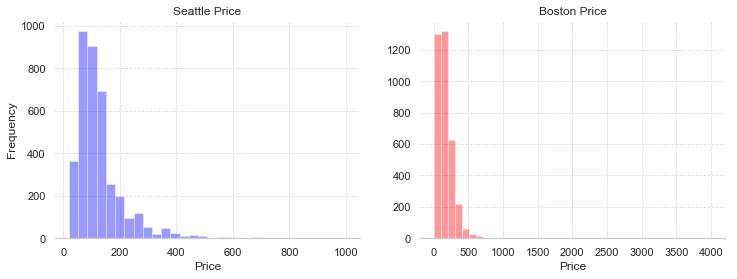

In [28]:
sea_price = sea_df_nostd.price.copy()
bos_price = bos_df_nostd.price.copy()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
sea_price.hist(bins=30, color='blue', alpha=0.4, ax=ax1)
bos_price.hist(bins=40, color='red', alpha=0.4, ax=ax2)
sns.despine(top=True, right=True, left=True)

ax1.set_title('Seattle Price')
ax2.set_title('Boston Price')
ax1.set_ylabel('Frequency')
ax1.set_xlabel('Price')
ax2.set_xlabel('Price')

Due to the scale issue, it is hard to compare two distributions. Therefore, let us transform price to log-price

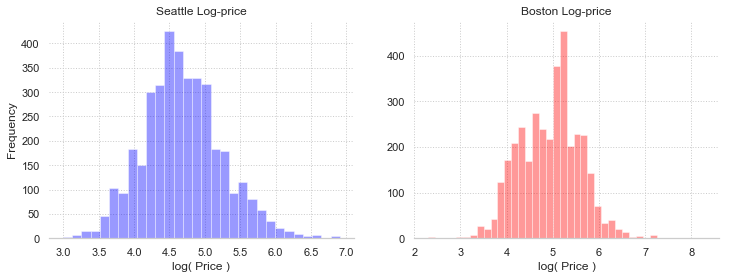

In [29]:
## Transform price to log-price
sea_price = sea_price.map(lambda x: np.log(x))
bos_price = bos_price.map(lambda x: np.log(x))

## Visualize again
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
sea_price.hist(bins=30, color='blue', alpha=0.4, ax=ax1)
bos_price.hist(bins=40, color='red', alpha=0.4, ax=ax2)
sns.despine(top=True, right=True, left=True)

ax1.set_title('Seattle Log-price')
ax2.set_title('Boston Log-price')
ax1.set_ylabel('Frequency')
ax1.set_xlabel('log( Price )')
ax2.set_xlabel('log( Price )');

In [30]:
## display statistics
_ = pd.concat([sea_price.describe(), bos_price.describe()], axis=1)
_.columns = ['Seattle log-price', 'Boston log-price']
_

,Seattle log-price,Boston log-price
count,3818.000000,3585.000000
mean,4.679227,4.940808
std,0.565525,0.652393
min,2.995732,2.302585
25%,4.317488,4.442651
50%,4.605170,5.010635
75%,5.010635,5.393628
max,6.907755,8.294050


We can observe that Boston price is in general higher and is more spread out. Seattle log-price distribution shows symetric aspect while Boston log-price distribution seems slightly left skewed implying that Boston rental price is formed high. According to [trulia], this results corresponds to median rent per month. On average, Boston's median rent per month now is formed around \\$2,900  and on contrary, Seattle's is around \\$2,700. Therefore, this results should come as no surprise. However, what is interesting is that medians sales price shows the opposite trend in two cities: median sales price of real estate is on average \\$690,000 in Seattle, and is \\$610,000 in Boston. Using the concept of price to rent ratio, we achieve 17.53 for Boston and 21.30 for Seattle. As a general rule of thumb, if the ratio is from 16 to 20, then it is risky to buy a property and if it is 21+, it is much better to rent than buy. Therefore, it seems Boston is more promising place to buy a house. 

[trulia]: https://www.trulia.com/

## Q2. How many Airbnb properties are hosted by the same host on average?

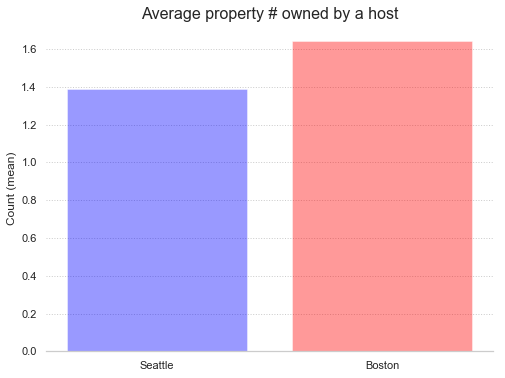

In [31]:
## seattle
sea_host = sea_df_nostd.groupby('host_id').count()['id']
sea_host.name = 'property_count'
## boston
bos_host = bos_df_nostd.groupby('host_id').count()['id']
bos_host.name = 'property_count'

## Visualization
plt.figure(figsize=(8, 6))
ax = plt.subplot()
ax.bar(['Seattle', 'Boston'], [sea_host.mean(), bos_host.mean()], color=['blue', 'red'], alpha=0.4)
sns.despine(top=True, right=True, left=True)
ax.xaxis.grid(False)
plt.title("Average property # owned by a host", fontsize=16)
plt.ylabel('Count (mean)');

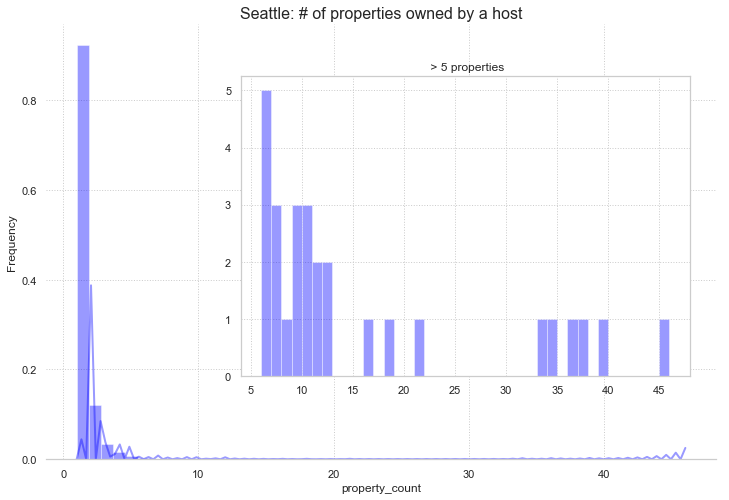

In [32]:
fig = plt.figure(figsize=(12,8))
ax = sns.distplot(sea_host, color='blue', hist_kws={'alpha':0.4}, kde_kws={'alpha':0.4})
plt.title('Seattle: # of properties owned by a host', fontsize=16)
plt.ylabel('Frequency')
sns.despine(top=True, right=True, left=True)

## set inner plot
rect = [0.35, 0.27, 0.52, 0.52]
ax2 = fig.add_axes(rect)
sns.distplot(sea_host[sea_host>5], bins=40, ax=ax2, kde=False, color='blue', kde_kws={'alpha':0.4})
ax2.set_title(" > 5 properties")
ax2.set_xlabel('');

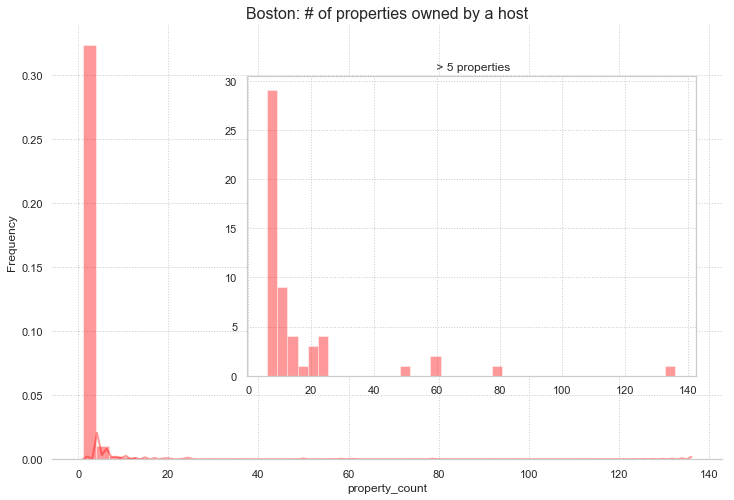

In [33]:
fig = plt.figure(figsize=(12,8))
ax = sns.distplot(bos_host, color='red', hist_kws={'alpha':0.4}, kde_kws={'alpha':0.4})
plt.title('Boston: # of properties owned by a host', fontsize=16)
plt.ylabel('Frequency')
sns.despine(top=True, right=True, left=True)

## set inner plot
rect = [0.35, 0.27, 0.52, 0.52]
ax2 = fig.add_axes(rect)
sns.distplot(bos_host[bos_host>5], bins=40, ax=ax2, kde=False, color='red', kde_kws={'alpha':0.4})
ax2.set_title(" > 5 properties")
ax2.set_xlabel('');


We see that on average, host in Boston owns more Airbnb properties. This might imply that fewer hosts determines the price of Airbnb properties. Looking at individual distributions, we can confirm that there are more 'super' hosts in Boston. Therefore, we can suppose those "super" users set Airbnb prices higher in Boston.

## Q3. How does price spread based on location - is it evenly distributed or unevenly? 
I will use 'zipcode' as a proxy for location information.

Standard Deviation is: 0.030


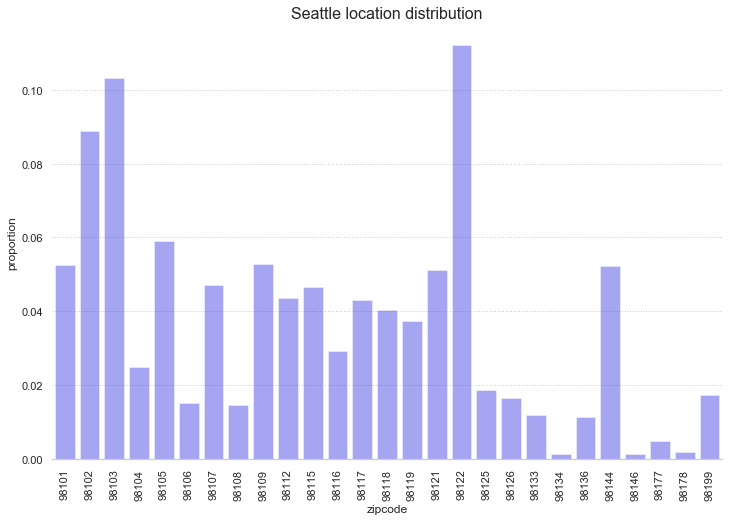

In [34]:
sea_zip = pd.DataFrame(sea_df_nostd.groupby('zipcode').count()['id'])
sea_zip = sea_zip.reset_index()
sea_zip.columns = ['zipcode', 'proportion']
sea_zip['proportion'] /= len(sea_df)

## visualize it
fig = plt.figure(figsize=(12,8))
ax = sns.barplot(x='zipcode', y='proportion', data=sea_zip, color='blue', alpha=0.4)
plt.xticks(rotation=90)
plt.title("Seattle location distribution", fontsize=16)
sns.despine(top=True, right=True, left=True)

print("Standard Deviation is: {:.3f}".format(sea_zip.proportion.std()))

Standard Deviation is: 0.028


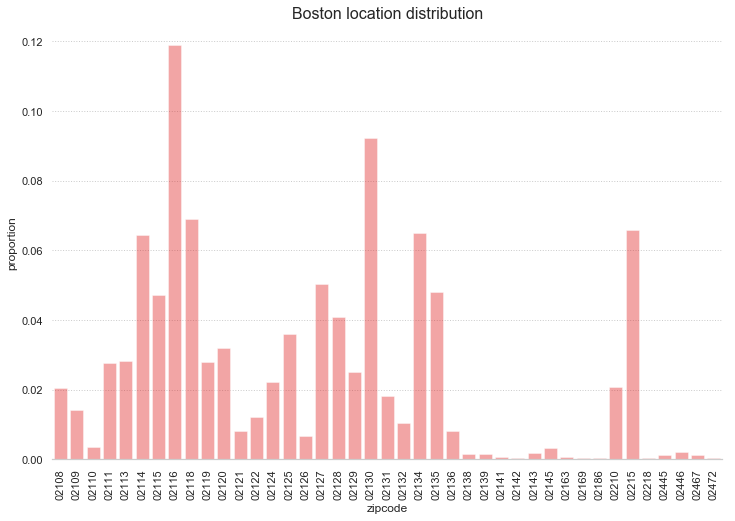

In [35]:
bos_zip = pd.DataFrame(bos_df_nostd.groupby('zipcode').count()['id'])
bos_zip = bos_zip.reset_index()
bos_zip.columns = ['zipcode', 'proportion']
bos_zip['proportion'] /= len(bos_df)

## visualize it
fig = plt.figure(figsize=(12,8))
ax = sns.barplot(x='zipcode', y='proportion', data=bos_zip, color='red', alpha=0.4)
plt.xticks(rotation=90)
plt.title("Boston location distribution", fontsize=16)
sns.despine(top=True, right=True, left=True)

print("Standard Deviation is: {:.3f}".format(bos_zip.proportion.std()))

When is comes to degree of the spread, the location distributions of two cities do not show much difference according to standard deviation. When we compare the distributions against rent maps (below) at [trulia], high proportion locations corresponds to high rent areas; therefore have higher impact on price distribution.

All in all, we can conclude that most Airbnb properties are crowded at hotspots of the cities.


[trulia]: https://www.trulia.com/

In [36]:
display(HTML('<table><tr><td><figure><img src="data/image/seattle_rent.png" style="height:400px" align="right"><figcaption> (Seattle rent heatmap) </figcaption></figure></td><td><figure><img src="data/image/boston_rent.png" style="height:400px" align="left"><figcaption> (Boston rent heatmap)</figcaption></figure></td></tr></table>'))

(Seattle rent heatmap),(Boston rent heatmap)


# 4. Model Data